# **Modelos Random Forest Clasiffier** 

**Cargando  el Dataset** 

In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
train = pd.read_csv('train.csv')
df_train = pd.DataFrame(train)
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


Buscando si hay nulos en el dataframe para poder rellenarlos posteriormente.

In [22]:
nan_rows = df_train[df_train.isnull().any(1)]
nan_rows

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667,9250_01,Europa,False,E/597/P,TRAPPIST-1e,29.0,False,0.0,2972.0,NaN,28.0,188.0,Chain Reedectied,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True


Rellenando el Datframe con un fillna, a través de la media del dataframe de train. 

In [23]:
df_train = df_train.fillna(df_train.mean())

c:\Users\lopez\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


**Empiezo a depurar los datos, para usarlo en el modelo de árbol que mejor me salió, procedí con varios get_dummies para convertir variables categóricas en númericas ya que aportan información.**

La primera de ella es la variable 'HomePlanet' que la dividí en Europa, Earth y Mars, borrando posteriormente la columna 'HomePlanet' para que no diera problemas. Una vez hecho el proceso, revisé por si había valores nulos. 

In [24]:
procedencia = pd.get_dummies(df_train['HomePlanet'])


In [25]:
df_train[['Earth', 'Europa', 'Mars']] = procedencia[['Earth', 'Europa', 'Mars']]
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Earth,Europa,Mars
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,0,1,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,1,0,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1,0,0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,0,1,0


In [133]:
df_train['Transported'].sum()

4378

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   object 
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Earth         8693 non-null   uint8  
 15  Europa        8693 non-null   uint8  
 16  Mars          8693 non-null   uint8  
dtypes: bool(1), float64(6), object(7), uint8(3)
memory usage: 917.0+ KB


In [28]:
df_train1412 = df_train.copy()
df_train1412['Cabin_Side'] = df_train1412['Cabin'].str.split("/").str[2]
df_train1412['Cabin_num'] = df_train1412['Cabin'].str.split("/").str[1]
df_train1412['Cabin_Deck'] = df_train1412['Cabin'].str.split("/").str[0]
df_train1412 = df_train1412.drop('Cabin',axis=1)
df_train1412

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Earth,Europa,Mars,Cabin_Side,Cabin_num,Cabin_Deck
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0,P,0,B
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0,S,0,F
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0,S,0,A
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,0,S,0,A
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0,0,S,1,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,0,1,0,P,98,A
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,1,0,0,S,1499,G
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1,0,0,S,1500,G
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,0,1,0,S,608,E


**Sacando graficas y viendo los datos**

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


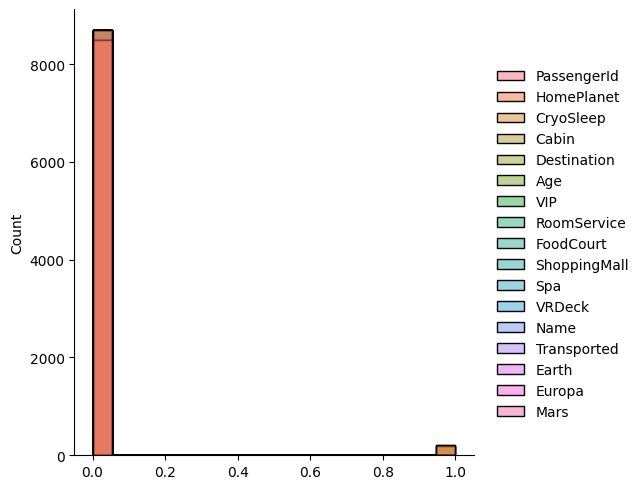

In [138]:
sns.displot(df_train.isnull())

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


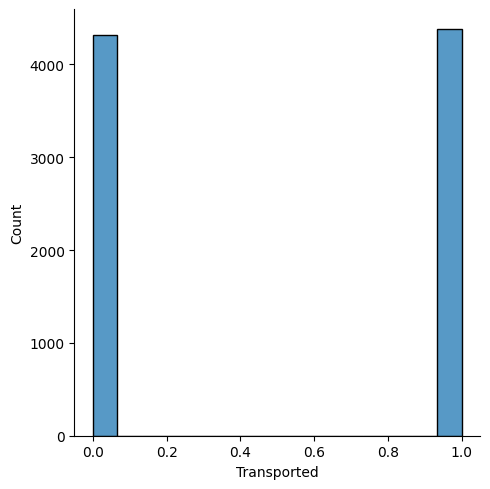

In [29]:
sns.displot(df_train['Transported'])


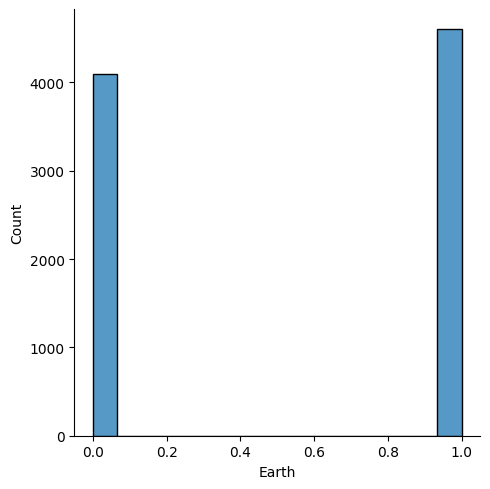

In [30]:
sns.displot(df_train1412['Earth'])

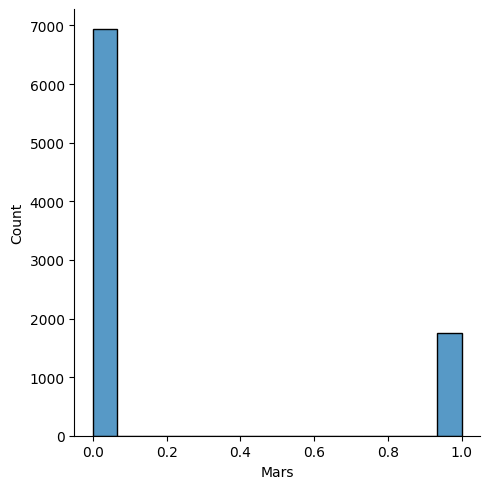

In [31]:
sns.displot(df_train1412['Mars'])

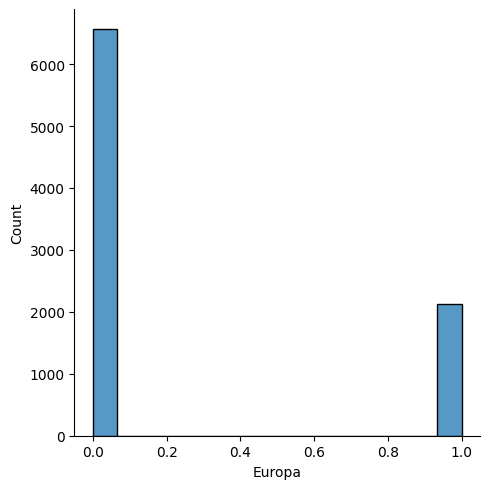

In [32]:
sns.displot(df_train1412['Europa'])

# **Modelo primero RandomForestClassifier**


**Este primer modelo fue el base para las mejoras posteriores**

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV

import pandas as pd

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [34]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Earth', 'Europa', 'Mars'],
      dtype='object')

In [35]:
X = df_train[['PassengerId', 'Earth', 'Mars', 'Europa', 'CryoSleep',  'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       ]]
y = df_train['Transported']

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.67,
                                                    random_state=0)

print(f"X_train: {X_train.shape}\ty_train: {y_train.shape}")
print(f"X_test: {X_test.shape}\ty_test: {y_test.shape}")

X_train: (5824, 12)	y_train: (5824,)
X_test: (2869, 12)	y_test: (2869,)


In [37]:
from sklearn.metrics import accuracy_score

In [38]:
tree = RandomForestClassifier(max_depth=3, random_state=0, min_samples_leaf=20)
tree.fit(X_train, y_train)
y_hat = tree.predict(X_test)
y_hat_train = tree.predict(X_train)

In [39]:
y_hat1 = tree.predict(X_train)
y_hat2 = tree.predict(X_test)
print("ACCURACY TRAIN:", accuracy_score(y_train, y_hat1))
print("ACCURACY TEST:", accuracy_score(y_test, y_hat2))


ACCURACY TRAIN: 0.7544642857142857
ACCURACY TEST: 0.7330080167305681


In [40]:
train_c = list(X_train.columns)

**Cargando el test**

In [41]:
test = pd.read_csv('test.csv')
df_test = pd.DataFrame(test)
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [42]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [43]:
df_test = df_test.fillna(df_test.mean())

c:\Users\lopez\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [44]:
procedenciat = pd.get_dummies(df_train['HomePlanet'])

In [45]:
df_test[['Earth', 'Europa', 'Mars']] = procedenciat[['Earth', 'Europa', 'Mars']]
newtest= df_test.drop(['HomePlanet', 'Destination','Cabin', 'Name'], axis=1)

In [46]:
df_test2 = newtest[train_c]
df_test2

,PassengerId,Earth,Mars,Europa,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,0,0,1,True,27.000000,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,1,0,0,False,19.000000,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,0,0,1,True,31.000000,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,0,0,1,False,38.000000,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,1,0,0,False,20.000000,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,0,0,True,34.000000,False,0.0,0.0,0.0,0.0,0.0
4273,9269_01,1,0,0,False,42.000000,False,0.0,847.0,17.0,10.0,144.0
4274,9271_01,0,1,0,True,28.658146,False,0.0,0.0,0.0,0.0,0.0
4275,9273_01,0,0,1,False,28.658146,False,0.0,2680.0,0.0,0.0,523.0


In [47]:
df_test2.isnull().sum()

PassengerId     0
Earth           0
Mars            0
Europa          0
CryoSleep       0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [48]:
prediccion = pd.DataFrame(tree.predict(df_test2))
prediccion['PassengerId'] =df_test2['PassengerId']
prediccion = prediccion.rename(columns = {0:'Transported'})


prediccion = prediccion[['PassengerId','Transported']]
prediccion.to_csv('Submision.csv', index=False)
prediccion



,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False


In [49]:
df_test2

,PassengerId,Earth,Mars,Europa,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,0,0,1,True,27.000000,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,1,0,0,False,19.000000,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,0,0,1,True,31.000000,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,0,0,1,False,38.000000,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,1,0,0,False,20.000000,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,0,0,True,34.000000,False,0.0,0.0,0.0,0.0,0.0
4273,9269_01,1,0,0,False,42.000000,False,0.0,847.0,17.0,10.0,144.0
4274,9271_01,0,1,0,True,28.658146,False,0.0,0.0,0.0,0.0,0.0
4275,9273_01,0,0,1,False,28.658146,False,0.0,2680.0,0.0,0.0,523.0


# **Primer Modelo con más filas y más datos introduciendo la cabina**

**Los pasos son los mismos para todos, se modifican los datos necesarios tanto en el train como en el test, que será la predicción mandada**

In [50]:
df_train1412 = pd.DataFrame(df_train.copy())
df_train1412['Cabin_Side'] = df_train1412['Cabin'].str.split("/").str[2]
df_train1412['Cabin_num'] = df_train1412['Cabin'].str.split("/").str[1]
df_train1412['Cabin_Deck'] = df_train1412['Cabin'].str.split("/").str[0]
df_train1412 = df_train1412.drop('Cabin',axis=1)


In [51]:
cabinas = pd.get_dummies(df_train1412['Cabin_Side'])
df_train1412[['Cabin_P', 'Cabin_S']] = cabinas[['P', 'S']]
df_train1412.drop('Cabin_Side', axis=1)



,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Earth,Europa,Mars,Cabin_num,Cabin_Deck,Cabin_P,Cabin_S
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0,0,B,1,0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0,0,F,0,1
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0,0,A,0,1
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,0,0,A,0,1
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0,0,1,F,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,0,1,0,98,A,1,0
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,1,0,0,1499,G,0,1
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1,0,0,1500,G,0,1
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,0,1,0,608,E,0,1


In [52]:
df_train1412.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   object 
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
 13  Earth         8693 non-null   uint8  
 14  Europa        8693 non-null   uint8  
 15  Mars          8693 non-null   uint8  
 16  Cabin_Side    8494 non-null   object 
 17  Cabin_num     8494 non-null   object 
 18  Cabin_Deck    8494 non-null 

In [53]:
df_train1412['Cabin_num'] = df_train1412['Cabin_num'].astype('float64')

In [54]:
procedencia1412 = pd.get_dummies(df_train['HomePlanet'])
df_train1412[['Earth', 'Europa', 'Mars']] = procedencia1412[['Earth', 'Europa', 'Mars']]
df_train1412 = df_train1412.drop(['HomePlanet', 'Destination', 'Name'], axis=1)


In [55]:
df_train1412.isnull().sum()


PassengerId       0
CryoSleep         0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Earth             0
Europa            0
Mars              0
Cabin_Side      199
Cabin_num       199
Cabin_Deck      199
Cabin_P           0
Cabin_S           0
dtype: int64

In [56]:
df_train1412['Cabin_num'].fillna(df_train1412['Cabin_num'].mode()[0], inplace=True)
df_train1412['Cabin_Side'].fillna(df_train1412['Cabin_Side'].mode()[0], inplace=True)
df_train1412['Cabin_Deck'].fillna(df_train1412['Cabin_Deck'].mode()[0], inplace=True)

In [57]:
df_train1412['Cabin_Deck'].unique()

array(['B', 'F', 'A', 'G', 'E', 'D', 'C', 'T'], dtype=object)

In [58]:
letras = pd.get_dummies(df_train1412['Cabin_Deck'])
df_train1412[['B','F','A','G','E','D','C','T']] = letras[['B','F','A','G','E','D','C','T']]


In [59]:
df_train1412

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Cabin_P,Cabin_S,B,F,A,G,E,D,C,T
0,0001_01,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,...,1,0,1,0,0,0,0,0,0,0
1,0002_01,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,...,0,1,0,1,0,0,0,0,0,0
2,0003_01,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,...,0,1,0,0,1,0,0,0,0,0
3,0003_02,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,...,0,1,0,0,1,0,0,0,0,0
4,0004_01,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,...,1,0,0,0,1,0,0,0,0,0
8689,9278_01,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False,...,0,1,0,0,0,1,0,0,0,0
8690,9279_01,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,...,0,1,0,0,0,1,0,0,0,0
8691,9280_01,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,...,0,1,0,0,0,0,1,0,0,0


In [60]:
X = df_train1412[['PassengerId',  'CryoSleep', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 
        'Earth', 'Europa', 'Mars',  'Cabin_num',
         'Cabin_P', 'Cabin_S', 'B', 'F', 'A', 'G', 'E', 'D', 'C', 'T']]

y = df_train1412['Transported']

In [61]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X,
                                                    y,
                                                    train_size=0.8,
                                                    random_state=0)

print(f"X_train: {X_train1.shape}\ty_train: {y_train1.shape}")
print(f"X_test: {X_test1.shape}\ty_test: {y_test1.shape}")

X_train: (6954, 23)	y_train: (6954,)
X_test: (1739, 23)	y_test: (1739,)


In [62]:
tree1 = RandomForestClassifier(max_depth=6, random_state=0, min_samples_leaf=40)
tree1.fit(X_train1, y_train1)
y_hat = tree1.predict(X_test1)
y_hat_train = tree1.predict(X_train1)

In [63]:
y_hat11 = tree1.predict(X_train1)
y_hat21 = tree1.predict(X_test1)
print("ACCURACY TRAIN:", accuracy_score(y_train1, y_hat11))
print("ACCURACY TEST:", accuracy_score(y_test1, y_hat21))


ACCURACY TRAIN: 0.7903364969801553
ACCURACY TEST: 0.7745830937320299


**A partir de aquí viene la prediccion del test.csv**

In [64]:
df_test1612 = df_test

In [65]:

df_test1612['Cabin_Side'] = df_test1612['Cabin'].str.split("/").str[2]
df_test1612['Cabin_num'] = df_test1612['Cabin'].str.split("/").str[1]
df_test1612['Cabin_Deck'] = df_test1612['Cabin'].str.split("/").str[0]
df_test1612 = df_test1612.drop('Cabin',axis=1)

In [66]:
df_test1612

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Earth,Europa,Mars,Cabin_Side,Cabin_num,Cabin_Deck
0,0013_01,Earth,True,TRAPPIST-1e,27.000000,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0,1,0,S,3,G
1,0018_01,Earth,False,TRAPPIST-1e,19.000000,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,1,0,0,S,4,F
2,0019_01,Europa,True,55 Cancri e,31.000000,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0,1,0,S,0,C
3,0021_01,Europa,False,TRAPPIST-1e,38.000000,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0,1,0,S,1,C
4,0023_01,Earth,False,TRAPPIST-1e,20.000000,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,1,0,0,S,5,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,1,0,0,S,1496,G
4273,9269_01,Earth,False,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,1,0,0,NaN,NaN,NaN
4274,9271_01,Mars,True,55 Cancri e,28.658146,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,0,0,1,P,296,D
4275,9273_01,Europa,False,NaN,28.658146,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,0,1,0,P,297,D


In [67]:
cabinas1 = pd.get_dummies(df_test1612['Cabin_Side'])
df_test1612[['Cabin_P', 'Cabin_S']] = cabinas1[['P', 'S']]
df_test1612.drop('Cabin_Side', axis=1)


,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Earth,Europa,Mars,Cabin_num,Cabin_Deck,Cabin_P,Cabin_S
0,0013_01,Earth,True,TRAPPIST-1e,27.000000,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0,1,0,3,G,0,1
1,0018_01,Earth,False,TRAPPIST-1e,19.000000,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,1,0,0,4,F,0,1
2,0019_01,Europa,True,55 Cancri e,31.000000,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0,1,0,0,C,0,1
3,0021_01,Europa,False,TRAPPIST-1e,38.000000,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0,1,0,1,C,0,1
4,0023_01,Earth,False,TRAPPIST-1e,20.000000,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,1,0,0,5,F,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,1,0,0,1496,G,0,1
4273,9269_01,Earth,False,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,1,0,0,NaN,NaN,0,0
4274,9271_01,Mars,True,55 Cancri e,28.658146,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,0,0,1,296,D,1,0
4275,9273_01,Europa,False,NaN,28.658146,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,0,1,0,297,D,1,0


In [68]:
df_test1612['Cabin_num'] = df_test1612['Cabin_num'].astype('float64')

In [69]:
procedencia1612 = pd.get_dummies(df_test1612['HomePlanet'])
df_test1612[['Earth', 'Europa', 'Mars']] = procedencia1612[['Earth', 'Europa', 'Mars']]
df_test1612 = df_test1612.drop(['HomePlanet', 'Destination', 'Name'], axis=1)


In [70]:
df_test1612['Cabin_num'].fillna(df_test1612['Cabin_num'].mode()[0], inplace=True)
df_test1612['Cabin_Side'].fillna(df_test1612['Cabin_Side'].mode()[0], inplace=True)
df_test1612['Cabin_Deck'].fillna(df_test1612['Cabin_Deck'].mode()[0], inplace=True)

In [71]:
letras1612 = pd.get_dummies(df_test1612['Cabin_Deck'])
df_test1612[['B','F','A','G','E','D','C','T']] = letras1612[['B','F','A','G','E','D','C','T']]


In [72]:
df_test1612 = df_test1612.drop(['Cabin_Side', 'Cabin_Deck'], axis=1)
df_test1612

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,...,Cabin_P,Cabin_S,B,F,A,G,E,D,C,T
0,0013_01,True,27.000000,False,0.0,0.0,0.0,0.0,0.0,1,...,0,1,0,0,0,1,0,0,0,0
1,0018_01,False,19.000000,False,0.0,9.0,0.0,2823.0,0.0,1,...,0,1,0,1,0,0,0,0,0,0
2,0019_01,True,31.000000,False,0.0,0.0,0.0,0.0,0.0,0,...,0,1,0,0,0,0,0,0,1,0
3,0021_01,False,38.000000,False,0.0,6652.0,0.0,181.0,585.0,0,...,0,1,0,0,0,0,0,0,1,0
4,0023_01,False,20.000000,False,10.0,0.0,635.0,0.0,0.0,1,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,True,34.000000,False,0.0,0.0,0.0,0.0,0.0,1,...,0,1,0,0,0,1,0,0,0,0
4273,9269_01,False,42.000000,False,0.0,847.0,17.0,10.0,144.0,1,...,0,0,0,1,0,0,0,0,0,0
4274,9271_01,True,28.658146,False,0.0,0.0,0.0,0.0,0.0,0,...,1,0,0,0,0,0,0,1,0,0
4275,9273_01,False,28.658146,False,0.0,2680.0,0.0,0.0,523.0,0,...,1,0,0,0,0,0,0,1,0,0


In [73]:
prediccion1612 = pd.DataFrame(tree.predict(df_test1612))
prediccion1612['PassengerId'] =df_test1612['PassengerId']
prediccion1612 = prediccion1612.rename(columns = {0:'Transported'})


prediccion1612 = prediccion1612[['PassengerId','Transported']]
prediccion1612.to_csv('Submision1612.csv', index=False)
prediccion1612



c:\Users\lopez\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- A
- B
- C
- Cabin_P
- Cabin_S
- ...
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 23 features, but RandomForestClassifier is expecting 12 features as input.

# **Modelo RandomForestClassifier con diferentes parametros**

Usando en max_depth 5 y min samples leaf de 50, a diferencia del primer modelo con los datos depurados que usé los parametros max_depth de 6 y min samples leaf de 40. En este caso empeoro.

In [74]:
tree2 = RandomForestClassifier(max_depth=5, random_state=0, min_samples_leaf=50)
tree2.fit(X_train1, y_train1)


y_hat1712 = tree2.predict(X_train1)
y_hat17 = tree2.predict(X_test1)
print("ACCURACY TRAIN:", accuracy_score(y_train1, y_hat1712))
print("ACCURACY TEST:", accuracy_score(y_test1, y_hat17))


ACCURACY TRAIN: 0.7766752947943629
ACCURACY TEST: 0.7590569292696953


En este caso, aumenté el número de max_depth a 8 y min samples leaf de 100, sigue sin mejorar el primer modelo con los datos depurados.

In [75]:
tree4 = RandomForestClassifier(max_depth=8, random_state=0, min_samples_leaf=100)
tree4.fit(X_train1, y_train1)


y_hat171 = tree4.predict(X_train1)
y_hat177 = tree4.predict(X_test1)
print("ACCURACY TRAIN:", accuracy_score(y_train1, y_hat171))
print("ACCURACY TEST:", accuracy_score(y_test1, y_hat177))


ACCURACY TRAIN: 0.7858786310037389
ACCURACY TEST: 0.7676825761932144


In [76]:
tree5 = RandomForestClassifier(max_depth=10, random_state=0, min_samples_leaf=50)
tree5.fit(X_train1, y_train1)


y_hat1715 = tree5.predict(X_train1)
y_hat1775 = tree5.predict(X_test1)
print("ACCURACY TRAIN:", accuracy_score(y_train1, y_hat1715))
print("ACCURACY TEST:", accuracy_score(y_test1, y_hat1775))


ACCURACY TRAIN: 0.8012654587287892
ACCURACY TEST: 0.7860839562967222


In [77]:
tree6 = RandomForestClassifier(max_depth=10, random_state=0, min_samples_leaf=40)
tree6.fit(X_train1, y_train1)


y_hat17156 = tree6.predict(X_train1)
y_hat17756 = tree6.predict(X_test1)
print("ACCURACY TRAIN:", accuracy_score(y_train1, y_hat17156))
print("ACCURACY TEST:", accuracy_score(y_test1, y_hat17756))


ACCURACY TRAIN: 0.8052919183203912
ACCURACY TEST: 0.7906843013225991


# **Modelo escogido, es el que mejor puntuación me dió**

**Usé de parametros max depth 10 y min samples leaf de 30**

Entrené y predije el modelo.

In [78]:

tree7 = RandomForestClassifier(max_depth=10, random_state=0, min_samples_leaf=30)
tree7.fit(X_train1, y_train1)


y_hat17157 = tree7.predict(X_train1)
y_hat17757 = tree7.predict(X_test1)
print("ACCURACY TRAIN:", accuracy_score(y_train1, y_hat17157))
print("ACCURACY TEST:", accuracy_score(y_test1, y_hat17757))

ACCURACY TRAIN: 0.8153580672993961
ACCURACY TEST: 0.7912593444508338


**Sacando la matriz de confusión del módelo escogido**

In [79]:
import sklearn.metrics as metrics
predictions = tree7.predict(X_test1)
cm = metrics.confusion_matrix(y_test1, predictions)
print(cm)

[[680 183]
 [180 696]]


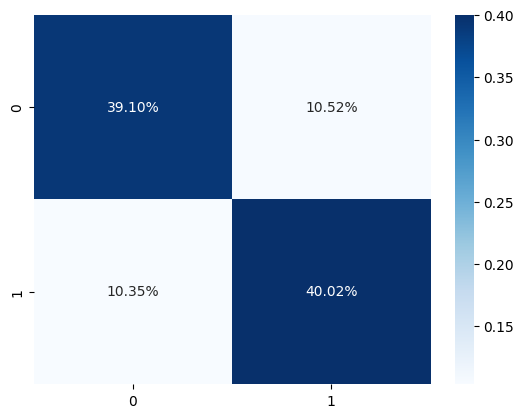

In [128]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues');

**Sacando las features improtances del modelo y su gráfica**

In [120]:
features = np.array(X_train1.columns)
features

array(['PassengerId', 'CryoSleep', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Earth', 'Europa',
       'Mars', 'Cabin_num', 'Cabin_P', 'Cabin_S', 'B', 'F', 'A', 'G', 'E',
       'D', 'C', 'T'], dtype=object)

In [124]:
feature_list = features

In [125]:
tree7.feature_importances_



import_dict = {'features': feature_list,
              'importance': tree7.feature_importances_}
df_imp = pd.DataFrame(import_dict).sort_values('importance', ascending=False)
df_imp

,features,importance
1,CryoSleep,0.203175
7,Spa,0.168189
4,RoomService,0.122345
8,VRDeck,0.108262
5,FoodCourt,0.078615
6,ShoppingMall,0.072256
9,Earth,0.041907
10,Europa,0.033090
2,Age,0.029147
12,Cabin_num,0.025277


<AxesSubplot:ylabel='features'>

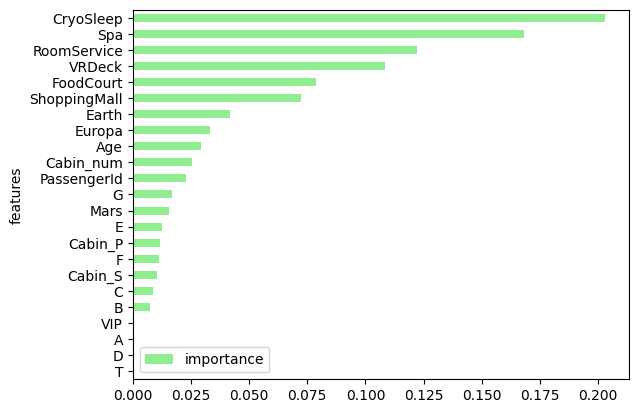

In [126]:
df_imp.set_index('features').sort_values(by='importance').plot(kind='barh', color='lightgreen')

Copiando el test y para poder hacer la submision, aplicando todos los cambios necesario para que fuero todo igual en train y test.

In [113]:
df_test1712 = df_test

df_test1712['Cabin_Side'] = df_test1712['Cabin'].str.split("/").str[2]
df_test1712['Cabin_num'] = df_test1712['Cabin'].str.split("/").str[1]
df_test1712['Cabin_Deck'] = df_test1712['Cabin'].str.split("/").str[0]
df_test1712 = df_test1712.drop('Cabin',axis=1)

In [114]:
cabinas17 = pd.get_dummies(df_test1712['Cabin_Side'])
df_test1712[['Cabin_P', 'Cabin_S']] = cabinas17[['P', 'S']]
df_test1712.drop('Cabin_Side', axis=1)


,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Earth,Europa,Mars,Cabin_num,Cabin_Deck,Cabin_P,Cabin_S
0,0013_01,Earth,True,TRAPPIST-1e,27.000000,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0,1,0,3,G,0,1
1,0018_01,Earth,False,TRAPPIST-1e,19.000000,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,1,0,0,4,F,0,1
2,0019_01,Europa,True,55 Cancri e,31.000000,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0,1,0,0,C,0,1
3,0021_01,Europa,False,TRAPPIST-1e,38.000000,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0,1,0,1,C,0,1
4,0023_01,Earth,False,TRAPPIST-1e,20.000000,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,1,0,0,5,F,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,1,0,0,1496,G,0,1
4273,9269_01,Earth,False,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,1,0,0,NaN,NaN,0,0
4274,9271_01,Mars,True,55 Cancri e,28.658146,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,0,0,1,296,D,1,0
4275,9273_01,Europa,False,NaN,28.658146,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,0,1,0,297,D,1,0


In [115]:
df_test1712['Cabin_num'] = df_test1712['Cabin_num'].astype('float64')

In [119]:
procedencia1712 = pd.get_dummies(df_test1712['HomePlanet'])
df_test1712[['Earth', 'Europa', 'Mars']] = procedencia1712[['Earth', 'Europa', 'Mars']]
df_test1712 = df_test1712.drop(['HomePlanet', 'Destination', 'Name'], axis=1)



In [120]:
df_test1712['Cabin_num'].fillna(df_test1712['Cabin_num'].mode()[0], inplace=True)
df_test1712['Cabin_Side'].fillna(df_test1712['Cabin_Side'].mode()[0], inplace=True)
df_test1712['Cabin_Deck'].fillna(df_test1712['Cabin_Deck'].mode()[0], inplace=True)

In [121]:
letras1712 = pd.get_dummies(df_test1712['Cabin_Deck'])
df_test1712[['B','F','A','G','E','D','C','T']] = letras1712[['B','F','A','G','E','D','C','T']]


In [123]:
df_test1712 = df_test1712.drop(['Cabin_Side', 'Cabin_Deck'], axis=1)
df_test1712

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,...,Cabin_P,Cabin_S,B,F,A,G,E,D,C,T
0,0013_01,True,27.000000,False,0.0,0.0,0.0,0.0,0.0,1,...,0,1,0,0,0,1,0,0,0,0
1,0018_01,False,19.000000,False,0.0,9.0,0.0,2823.0,0.0,1,...,0,1,0,1,0,0,0,0,0,0
2,0019_01,True,31.000000,False,0.0,0.0,0.0,0.0,0.0,0,...,0,1,0,0,0,0,0,0,1,0
3,0021_01,False,38.000000,False,0.0,6652.0,0.0,181.0,585.0,0,...,0,1,0,0,0,0,0,0,1,0
4,0023_01,False,20.000000,False,10.0,0.0,635.0,0.0,0.0,1,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,True,34.000000,False,0.0,0.0,0.0,0.0,0.0,1,...,0,1,0,0,0,1,0,0,0,0
4273,9269_01,False,42.000000,False,0.0,847.0,17.0,10.0,144.0,1,...,0,0,0,1,0,0,0,0,0,0
4274,9271_01,True,28.658146,False,0.0,0.0,0.0,0.0,0.0,0,...,1,0,0,0,0,0,0,1,0,0
4275,9273_01,False,28.658146,False,0.0,2680.0,0.0,0.0,523.0,0,...,1,0,0,0,0,0,0,1,0,0


In [126]:
prediccion1712 = pd.DataFrame(tree7.predict(df_test1712))
prediccion1712['PassengerId'] =df_test1712['PassengerId']
prediccion1712 = prediccion1712.rename(columns = {0:'Transported'})


prediccion1712 = prediccion1712[['PassengerId','Transported']]
prediccion1712.to_csv('Submision1712.csv', index=False)
prediccion1712



,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


# **Cross Validation para ver si el modelo funciona correctamente.**

In [81]:

from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [84]:
y_test

3601     True
6057     True
2797    False
7110    False
8579     True
        ...  
4932    False
5287    False
3849     True
5766     True
7991    False
Name: Transported, Length: 2869, dtype: bool

In [93]:
name='Ramdom Forest Classifier'
kfold = model_selection.KFold(n_splits=10) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = model_selection.cross_val_score(tree7, X  , y, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)

[0.79425287 0.76896552 0.77471264 0.78826237 0.78481013 0.81357883
 0.81703107 0.81703107 0.81242808 0.78481013]
Ramdom Forest Classifier: 0.795588 (0.017202)


# **Modelo entrenado entero, después de haber comprobado la validación cruzada**

In [97]:
tree7.fit(X, y)


RandomForestClassifier(max_depth=10, min_samples_leaf=30, random_state=0)

In [98]:
df_test2112 = df_test

In [99]:
df_test2112['Cabin_Side'] = df_test2112['Cabin'].str.split("/").str[2]
df_test2112['Cabin_num'] = df_test2112['Cabin'].str.split("/").str[1]
df_test2112['Cabin_Deck'] = df_test2112['Cabin'].str.split("/").str[0]
df_test2112 = df_test2112.drop('Cabin',axis=1)

In [100]:
cabinas21 = pd.get_dummies(df_test2112['Cabin_Side'])
df_test2112[['Cabin_P', 'Cabin_S']] = cabinas21[['P', 'S']]
df_test2112.drop('Cabin_Side', axis=1)


,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Earth,Europa,Mars,Cabin_num,Cabin_Deck,Cabin_P,Cabin_S
0,0013_01,Earth,True,TRAPPIST-1e,27.000000,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0,1,0,3,G,0,1
1,0018_01,Earth,False,TRAPPIST-1e,19.000000,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,1,0,0,4,F,0,1
2,0019_01,Europa,True,55 Cancri e,31.000000,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0,1,0,0,C,0,1
3,0021_01,Europa,False,TRAPPIST-1e,38.000000,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0,1,0,1,C,0,1
4,0023_01,Earth,False,TRAPPIST-1e,20.000000,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,1,0,0,5,F,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,1,0,0,1496,G,0,1
4273,9269_01,Earth,False,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,1,0,0,NaN,NaN,0,0
4274,9271_01,Mars,True,55 Cancri e,28.658146,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,0,0,1,296,D,1,0
4275,9273_01,Europa,False,NaN,28.658146,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,0,1,0,297,D,1,0


In [102]:
df_test2112['Cabin_num'] = df_test2112['Cabin_num'].astype('float64')

In [103]:
procedencia2112 = pd.get_dummies(df_test2112['HomePlanet'])
df_test2112[['Earth', 'Europa', 'Mars']] = procedencia2112[['Earth', 'Europa', 'Mars']]
df_test2112 = df_test2112.drop(['HomePlanet', 'Destination', 'Name'], axis=1)


In [104]:
df_test2112['Cabin_num'].fillna(df_test2112['Cabin_num'].mode()[0], inplace=True)
df_test2112['Cabin_Side'].fillna(df_test2112['Cabin_Side'].mode()[0], inplace=True)
df_test2112['Cabin_Deck'].fillna(df_test2112['Cabin_Deck'].mode()[0], inplace=True)

In [105]:
letras2112 = pd.get_dummies(df_test2112['Cabin_Deck'])
df_test2112[['B','F','A','G','E','D','C','T']] = letras2112[['B','F','A','G','E','D','C','T']]


In [106]:
df_test2112 = df_test2112.drop(['Cabin_Side', 'Cabin_Deck'], axis=1)
df_test2112

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,...,Cabin_P,Cabin_S,B,F,A,G,E,D,C,T
0,0013_01,True,27.000000,False,0.0,0.0,0.0,0.0,0.0,1,...,0,1,0,0,0,1,0,0,0,0
1,0018_01,False,19.000000,False,0.0,9.0,0.0,2823.0,0.0,1,...,0,1,0,1,0,0,0,0,0,0
2,0019_01,True,31.000000,False,0.0,0.0,0.0,0.0,0.0,0,...,0,1,0,0,0,0,0,0,1,0
3,0021_01,False,38.000000,False,0.0,6652.0,0.0,181.0,585.0,0,...,0,1,0,0,0,0,0,0,1,0
4,0023_01,False,20.000000,False,10.0,0.0,635.0,0.0,0.0,1,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,True,34.000000,False,0.0,0.0,0.0,0.0,0.0,1,...,0,1,0,0,0,1,0,0,0,0
4273,9269_01,False,42.000000,False,0.0,847.0,17.0,10.0,144.0,1,...,0,0,0,1,0,0,0,0,0,0
4274,9271_01,True,28.658146,False,0.0,0.0,0.0,0.0,0.0,0,...,1,0,0,0,0,0,0,1,0,0
4275,9273_01,False,28.658146,False,0.0,2680.0,0.0,0.0,523.0,0,...,1,0,0,0,0,0,0,1,0,0


In [109]:
prediccion2112 = pd.DataFrame(tree7.predict(df_test2112))
prediccion2112['PassengerId'] =df_test2112['PassengerId']
prediccion2112 = prediccion2112.rename(columns = {0:'Transported'})


prediccion2112 = prediccion2112[['PassengerId','Transported']]
prediccion2112.to_csv('Submision2112.csv', index=False)
prediccion2112


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
